In [1]:
import acquire as a
import prepare as p

In [2]:
raw_data = a.scrape_github_data()
raw_data

,Unnamed: 0,Unnamed: 0.1,repo,language,readme_contents
0,0,0,python-discord/bot,Python,# Python Utility Bot\n\n[![Discord][7]][8]\n[!...
1,1,1,discord-tickets/bot,JavaScript,[![GitHub stars](https://img.shields.io/github...
2,2,2,go-chat-bot/bot,Go,# go-bot\n\n[![Circle CI](https://circleci.com...
3,3,3,SuMaiKaDe/bot,Python,\n\n#### 22年2月7日\n - 修改青龙 _id 字段为 id\n#### ...
4,4,4,microsoft/BotBuilder-Samples,JavaScript,\r\n# ![Bot Framework Samples](./docs/media/Bo...
...,...,...,...,...,...
595,595,595,sdslabs/bot,CoffeeScript,bot\n===\n\nbot is our friendly robot that sit...
596,596,596,howdyai/botkit-starter-slack,JavaScript,# This repo is deprecated!\n\nTo get a fresh B...
597,597,597,dotnet-architecture/eShopOnContainersAI,JavaScript,# eShopOnContainersAI \n\n## Definition and go...
598,598,598,dueros/bot-sdk-node.js,JavaScript,# 度秘BOT SDK for nodejs\n这是一个帮助开发Bot的SDK，我们强烈建议...


In [3]:
df = p.clean_and_filter_data()
df

,repo,language,readme_contents,clean,lemmatized
0,python-discord/bot,Python,# Python Utility Bot\n\n[![Discord][7]][8]\n[!...,python utility bot discord78 lint test12 build...,python utility bot discord78 lint test12 build...
1,microsoft/BotBuilder-Samples,JavaScript,\r\n# ![Bot Framework Samples](./docs/media/Bo...,bot framework samplesdocsmediabotframeworksamp...,bot framework samplesdocsmediabotframeworksamp...
2,GAwesomeBot/bot,JavaScript,# GAwesomeBot\n[![Travis Status](https://travi...,gawesomebot travis statushttpstravisciorggilbe...,gawesomebot travis statushttpstravisciorggilbe...
3,roughike/BottomBar,Java,# BottomBar (Deprecated)\n\nI don't have time ...,bottombar deprecated dont time maintain anymor...,bottombar deprecated dont time maintain anymor...
4,mithun-prasad/Bot,C#,# Developing and Deploying Intelligent Chat Bo...,developing deploying intelligent chat bots tra...,developing deploying intelligent chat bot trai...
...,...,...,...,...,...
220,rougeth/bottery,Python,# bottery\n:battery: A framework for building ...,bottery battery framework building bots build ...,bottery battery framework building bot build s...
221,microsoft/BotBuilder-V3,C#,# V3 Deprecation Notification\n\nMicrosoft Bot...,v3 deprecation notification microsoft bot fram...,v3 deprecation notification microsoft bot fram...
222,2018kguo/RobinhoodBot,Python,# RobinhoodBot\nTrading bot for Robinhood acco...,robinhoodbot trading bot robinhood accounts in...,robinhoodbot trading bot robinhood account inf...
223,howdyai/botkit-starter-slack,JavaScript,# This repo is deprecated!\n\nTo get a fresh B...,repo deprecated get fresh botkit starter kit u...,repo deprecated get fresh botkit starter kit u...


In [4]:
train, validate, test = p.split_data(df)

In [5]:
train.shape, validate.shape, test.shape

((126, 5), (54, 5), (45, 5))

In [6]:
for df in train, validate, test:
    print(df.language.value_counts(normalize = True))
    print()

Python        0.460317
JavaScript    0.253968
TypeScript    0.103175
Java          0.095238
C#            0.087302
Name: language, dtype: float64

Python        0.555556
JavaScript    0.222222
Java          0.129630
C#            0.074074
TypeScript    0.018519
Name: language, dtype: float64

Python        0.488889
JavaScript    0.244444
Java          0.111111
C#            0.088889
TypeScript    0.066667
Name: language, dtype: float64



In [7]:
import explore

In [8]:
train, validate, test = explore.new_features(train, validate, test)

In [9]:
test.head()

,repo,language,readme_contents,clean,lemmatized,char_count,word_count
178,hyperchessbot/hyperbot,JavaScript,# Welcome to Hyper Bot !\n## Create your own p...,welcome hyper bot create permanent hyper bot r...,welcome hyper bot create permanent hyper bot r...,8014,952
137,MoveAngel/One4uBot,Python,"# One4uBot userbot project\n\n<p align=""center...",one4ubot userbot project p aligncenter hrefhtt...,one4ubot userbot project p aligncenter hrefhtt...,3569,190
25,aiogram/bot,Python,# aiogram_bot\n\nThis bot is used as example o...,aiogram_bot bot used example usage aiogramhttp...,aiogram_bot bot used example usage aiogramhttp...,1835,253
44,linuxacademy/content-lambda-boto3,Python,"# Automating AWS with Lambda, Python, and Boto...",automating aws lambda python boto3 course http...,automating aws lambda python boto3 course http...,80,7
151,freeCodeCamp/100DaysOfCode-twitter-bot,JavaScript,# [100DaysOfCode Twitter Bot](https://twitter....,100daysofcode twitter bothttpstwittercomhashta...,100daysofcode twitter bothttpstwittercomhashta...,3295,211


In [10]:
train.language.value_counts(ascending = True, normalize = True)

C#            0.087302
Java          0.095238
TypeScript    0.103175
JavaScript    0.253968
Python        0.460317
Name: language, dtype: float64

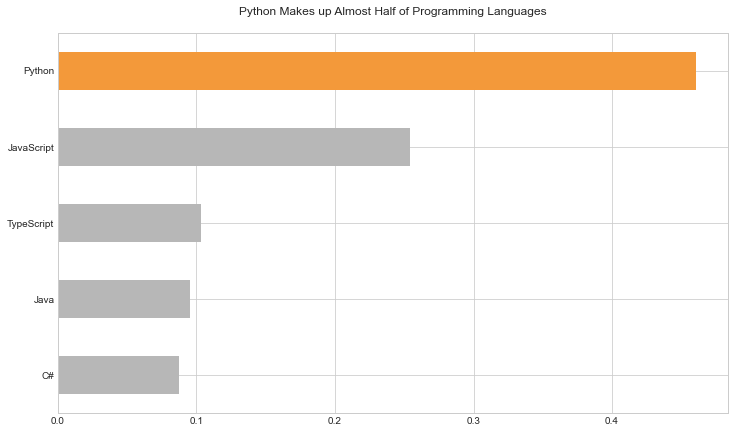

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

train.language.value_counts(ascending = True, normalize = True).plot.barh(color = \
                                                    ['#b7b7b7ff', '#b7b7b7ff', '#b7b7b7ff', '#b7b7b7ff', \
                                                    '#f3993aff'], figsize = (12, 7))
plt.title('Python Makes up Almost Half of Programming Languages\n')
plt.show()

# Model Split

In [12]:
def X_y_splits(train, validate, test):
    '''
    This functions takes in the train, validate, and test dfs and splits them into X and y dfs for
    each.
    '''
    
    X_train = train.lemmatized
    y_train = train.language
    
    X_validate = validate.lemmatized
    y_validate = validate.language
    
    X_test = test.lemmatized
    y_test = test.language
    
    return X_train, y_train, X_validate, y_validate, X_test, y_test

In [13]:
X_train, y_train, X_validate, y_validate, X_test, y_test = X_y_splits(train, validate, test)

# Baseline

In [16]:
import pandas as pd
df_results = pd.DataFrame(y_train).rename(columns = {'language': 'actual'})

df_results['baseline'] = 'Python'

df_results

,actual,baseline
41,JavaScript,Python
117,C#,Python
167,Python,Python
110,Python,Python
26,Python,Python
...,...,...
100,Python,Python
70,JavaScript,Python
102,JavaScript,Python
155,JavaScript,Python


In [21]:
print(f'Baseline Accuracy: {int(round((df_results.actual == df_results.baseline).mean(), 2)*100)}%')

Baseline Accuracy: 46%


In [24]:
import acquire
import prepare

In [26]:
clean_data = prepare.clean_and_filter_data()

In [27]:
clean_data.head()

,repo,language,readme_contents,clean,lemmatized
0,python-discord/bot,Python,# Python Utility Bot\n\n[![Discord][7]][8]\n[!...,python utility bot discord78 lint test12 build...,python utility bot discord78 lint test12 build...
1,microsoft/BotBuilder-Samples,JavaScript,\r\n# ![Bot Framework Samples](./docs/media/Bo...,bot framework samplesdocsmediabotframeworksamp...,bot framework samplesdocsmediabotframeworksamp...
2,GAwesomeBot/bot,JavaScript,# GAwesomeBot\n[![Travis Status](https://travi...,gawesomebot travis statushttpstravisciorggilbe...,gawesomebot travis statushttpstravisciorggilbe...
3,roughike/BottomBar,Java,# BottomBar (Deprecated)\n\nI don't have time ...,bottombar deprecated dont time maintain anymor...,bottombar deprecated dont time maintain anymor...
4,mithun-prasad/Bot,C#,# Developing and Deploying Intelligent Chat Bo...,developing deploying intelligent chat bots tra...,developing deploying intelligent chat bot trai...


In [ ]:
cv = CountVectorizer()

X = cv.fit_transform(train.lemmatized)
y = train.language

